https://tfhub.dev/google/collections/image/1
https://www.kaggle.com/code/nafisur/dog-breed-identification-keras-cnn-basic


# Read in Data

First we want to get the data in a suitable format to send to the Deep Learning Architecture



In [ ]:
import os
import tensorflow as tf

_URL = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
path_to_zip = tf.keras.utils.get_file('images.tar', origin=_URL, extract=True)


793579520/793579520 [==============================] - 58s 0us/step


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
dir = os.path.join(os.path.dirname(path_to_zip), 'Images')
train_dataset = tf.keras.utils.image_dataset_from_directory(dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            validation_split=.2,
                                                            subset='training',
                                                            seed=2021)

validation_dataset = tf.keras.utils.image_dataset_from_directory(dir,
                                                           shuffle=True,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMG_SIZE,
                                                           validation_split=.2,
                                                           subset='validation',
                                                           seed=2021)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [ ]:
len(train_dataset.class_names)

120

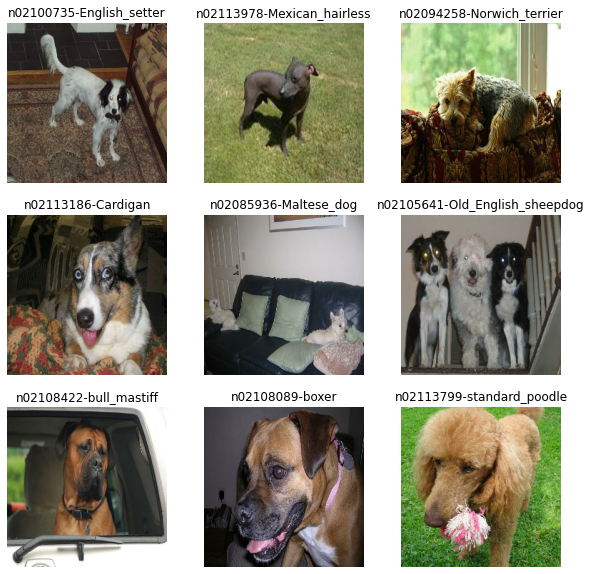

In [ ]:
import matplotlib.pyplot as plt
class_names = train_dataset.class_names
v_class_names = validation_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer = tf.keras.layers.Dense(120)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.RandomFlip('horizontal'))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(rescale)
model.add(base_model)
model.add(global_average_layer)
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(120, activation='softmax'))


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
515/515 [==============================] - 71s 118ms/step - loss: 3.9415 - accuracy: 0.1559 - val_loss: 2.7060 - val_accuracy: 0.4837
Epoch 2/20
515/515 [==============================] - 51s 99ms/step - loss: 2.4847 - accuracy: 0.4395 - val_loss: 1.7163 - val_accuracy: 0.6783
Epoch 3/20
515/515 [==============================] - 50s 97ms/step - loss: 1.8830 - accuracy: 0.5491 - val_loss: 1.2748 - val_accuracy: 0.7359
Epoch 4/20
515/515 [==============================] - 50s 97ms/step - loss: 1.5816 - accuracy: 0.6010 - val_loss: 1.0450 - val_accuracy: 0.7685
Epoch 5/20
515/515 [==============================] - 49s 95ms/step - loss: 1.4215 - accuracy: 0.6311 - val_loss: 0.9078 - val_accuracy: 0.7894
Epoch 6/20
515/515 [==============================] - 50s 97ms/step - loss: 1.3041 - accuracy: 0.6529 - val_loss: 0.8189 - val_accuracy: 0.8005
Epoch 7/20
515/515 [==============================] - 50s 97ms/step - loss: 1.2187 - accuracy: 0.6719 - val_loss: 0.7613 - val_accuracy

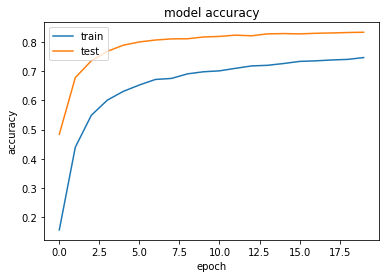

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 41ms/step


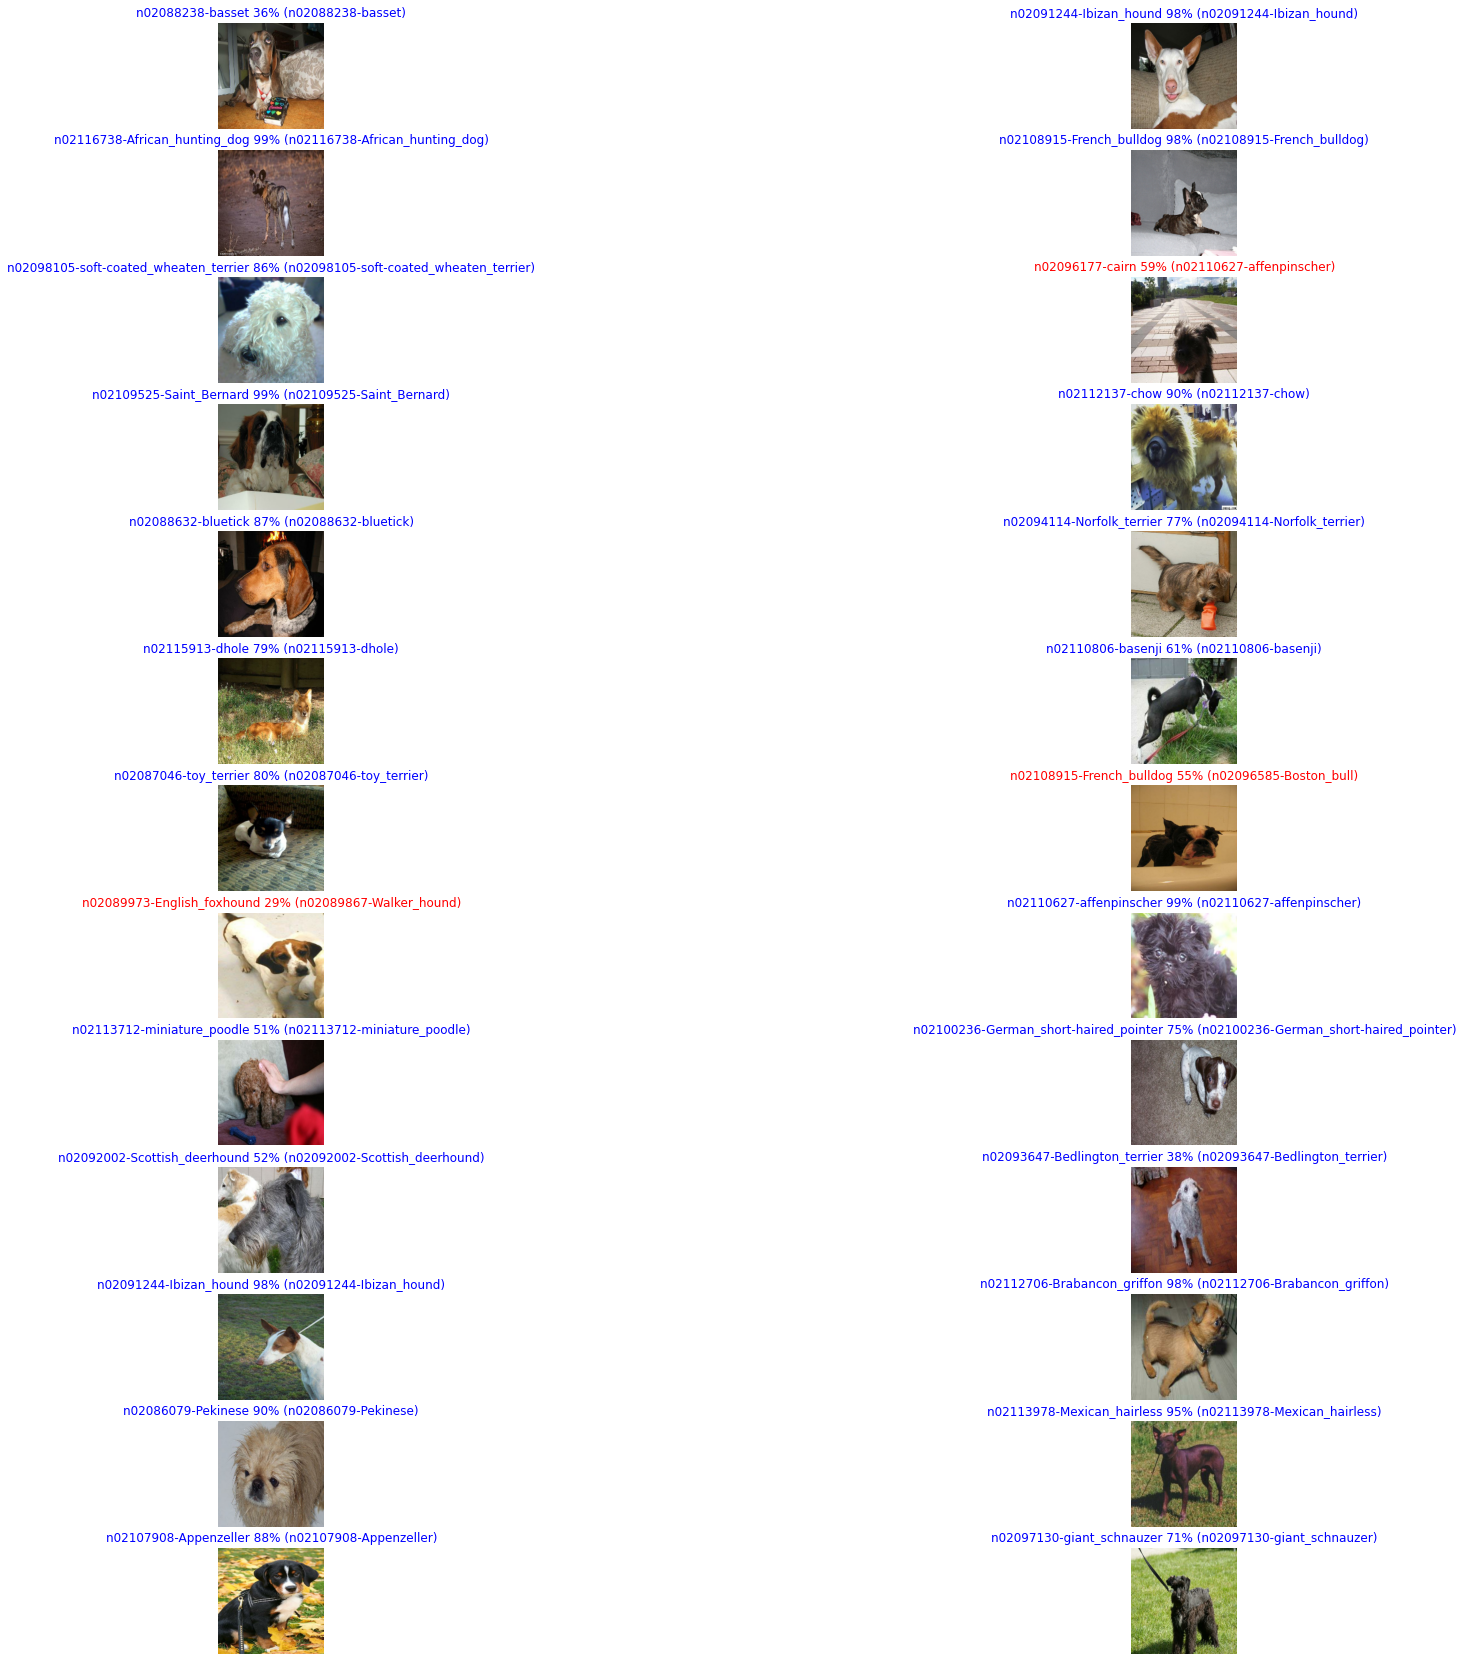

In [ ]:
plt.figure(figsize=(30, 30))
for images, labels in validation_dataset.take(1):
  predictions = model.predict(images)
  for i in range(26):
    ax = plt.subplot(13, 2, i + 1)
    predicted_label = np.argmax(predictions[i])
    if class_names[predicted_label] == v_class_names[labels[i]]:
      color = 'blue'
    else:
      color = 'red'
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions[i]),
                                v_class_names[labels[i]]),
                                color=color)
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.RandomFlip('horizontal'))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(rescale)
model.add(base_model)
model.add(global_average_layer)
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
515/515 [==============================] - 68s 100ms/step - loss: 2.9583 - accuracy: 0.3452 - val_loss: 1.0331 - val_accuracy: 0.7568
Epoch 2/20
515/515 [==============================] - 49s 95ms/step - loss: 1.5350 - accuracy: 0.5847 - val_loss: 0.7172 - val_accuracy: 0.8015
Epoch 3/20
515/515 [==============================] - 49s 94ms/step - loss: 1.3073 - accuracy: 0.6311 - val_loss: 0.6328 - val_accuracy: 0.8171
Epoch 4/20
515/515 [==============================] - 50s 96ms/step - loss: 1.2031 - accuracy: 0.6569 - val_loss: 0.6041 - val_accuracy: 0.8154
Epoch 5/20
515/515 [==============================] - 50s 96ms/step - loss: 1.1298 - accuracy: 0.6723 - val_loss: 0.5823 - val_accuracy: 0.8175
Epoch 6/20
515/515 [==============================] - 50s 97ms/step - loss: 1.0684 - accuracy: 0.6881 - val_loss: 0.5644 - val_accuracy: 0.8214
Epoch 7/20
515/515 [==============================] - 50s 96ms/step - loss: 1.0376 - accuracy: 0.6955 - val_loss: 0.5526 - val_accuracy

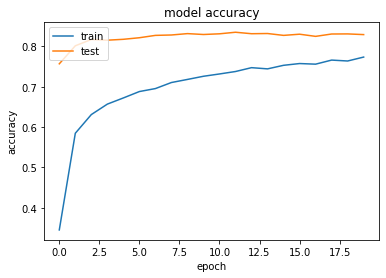

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.RandomFlip('horizontal'))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(rescale)
model.add(base_model)
model.add(global_average_layer)
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1000, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
515/515 [==============================] - 52s 95ms/step - loss: 3.8579 - accuracy: 0.2449 - val_loss: 2.6005 - val_accuracy: 0.6545
Epoch 2/20
515/515 [==============================] - 50s 96ms/step - loss: 2.4186 - accuracy: 0.5193 - val_loss: 1.5371 - val_accuracy: 0.7568
Epoch 3/20
515/515 [==============================] - 49s 95ms/step - loss: 1.8094 - accuracy: 0.5996 - val_loss: 1.1172 - val_accuracy: 0.7894
Epoch 4/20
515/515 [==============================] - 50s 96ms/step - loss: 1.5268 - accuracy: 0.6325 - val_loss: 0.9153 - val_accuracy: 0.8044
Epoch 5/20
515/515 [==============================] - 51s 98ms/step - loss: 1.3682 - accuracy: 0.6509 - val_loss: 0.8058 - val_accuracy: 0.8112
Epoch 6/20
515/515 [==============================] - 50s 96ms/step - loss: 1.2798 - accuracy: 0.6598 - val_loss: 0.7379 - val_accuracy: 0.8149
Epoch 7/20
515/515 [==============================] - 50s 96ms/step - loss: 1.1966 - accuracy: 0.6805 - val_loss: 0.6946 - val_accuracy:

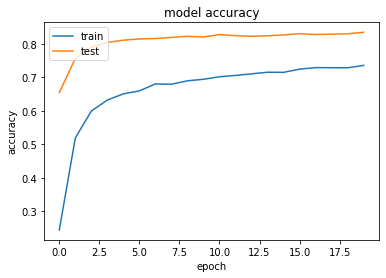

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.RandomFlip('horizontal'))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(rescale)
model.add(base_model)
model.add(global_average_layer)
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
515/515 [==============================] - 54s 96ms/step - loss: 3.2572 - accuracy: 0.2671 - val_loss: 1.1437 - val_accuracy: 0.7298
Epoch 2/20
515/515 [==============================] - 49s 95ms/step - loss: 1.7561 - accuracy: 0.5258 - val_loss: 0.7702 - val_accuracy: 0.7864
Epoch 3/20
515/515 [==============================] - 51s 98ms/step - loss: 1.4931 - accuracy: 0.5795 - val_loss: 0.6765 - val_accuracy: 0.7993
Epoch 4/20
515/515 [==============================] - 49s 95ms/step - loss: 1.3585 - accuracy: 0.6169 - val_loss: 0.6391 - val_accuracy: 0.8017
Epoch 5/20
515/515 [==============================] - 49s 95ms/step - loss: 1.2889 - accuracy: 0.6304 - val_loss: 0.6023 - val_accuracy: 0.8151
Epoch 6/20
515/515 [==============================] - 50s 96ms/step - loss: 1.2080 - accuracy: 0.6493 - val_loss: 0.5963 - val_accuracy: 0.8156
Epoch 7/20
515/515 [==============================] - 50s 97ms/step - loss: 1.1589 - accuracy: 0.6605 - val_loss: 0.5687 - val_accuracy:

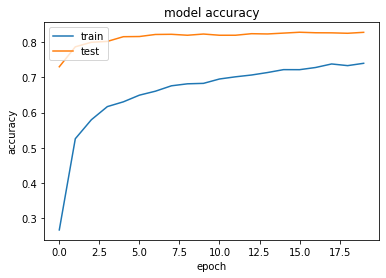

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.RandomFlip('horizontal'))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(rescale)
model.add(base_model)
model.add(global_average_layer)
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1000, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.RandomFlip('horizontal'))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(rescale)
model.add(base_model)
model.add(global_average_layer)
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1000, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1000, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()